#BOLLINGER BANDS STRATEGY:
Bollinger Bands are a technical analysis tool created by John Bollinger in the 1980s. They consist of a moving average and two standard deviations plotted above and below it. The bands are used to measure volatility and identify potential breakouts and trend reversals.

In [35]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt


<Axes: title={'center': 'Stock Price'}>

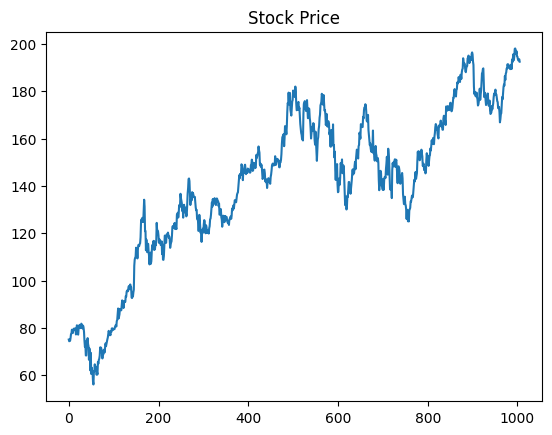

In [36]:

# Define the stock symbol and date range
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-01-01'

# Fetch historical data from Yahoo Finance
#Read apple stock data
#data = web.DataReader(symbol, 'google', start_date, end_date)
data= pd.read_csv('AAPL.csv')
data.head()
data['Close'].plot(title='Stock Price')


Calculate Middle Band which is the moving average, Upper Bolinger band and Lower Bolinger band.
Buy Signal generated when price goes below lower band and sell signal is generated when price moves above upper band 

In [37]:

# Step 2: Calculate Bollinger Bands
window = 20  # Rolling window for moving average and standard deviation
data['Middle Band'] = data['Close'].rolling(window).mean()
data['Std Dev'] = data['Close'].rolling(window).std()
data['Upper Band'] = data['Middle Band'] + (2 * data['Std Dev'])
data['Lower Band'] = data['Middle Band'] - (2 * data['Std Dev'])


In [38]:

# Step 3: Generate Signals
data['Signal'] = 0
data['Signal'] = np.where(data['Close'] < data['Lower Band'], 1, data['Signal'])
data['Signal'] = np.where(data['Close'] > data['Upper Band'], -1, data['Signal'])
data['Position'] = data['Signal'].shift()


In [39]:
# Step 4: Backtest the Strategy
initial_capital = 100000
data['Cash']=0
data['Cash'].iloc[0]=100000
capital = initial_capital
data['Holdings']=0
#print(data.head())
# Simulate trading
for i in range(1, len(data)):
    if data['Position'].iloc[i] == 1 and data['Position'].iloc[i-1] != 1:  # Buy signal
        shares_to_buy = data['Cash'].iloc[i-1] // data['Close'].iloc[i]
        if shares_to_buy > 0:
            capital = 0
            data['Holdings'].iloc[i] = shares_to_buy
            data['Cash'].iloc[i]=0
        else:
            data['Holdings'].iloc[i] = data['Holdings'].iloc[i-1]
            data['Cash'].iloc[i]=data['Cash'].iloc[i-1]
            
    elif data['Position'].iloc[i] == -1 and data['Position'].iloc[i-1] != -1:  # Sell signal
        shares_to_sell = data['Holdings'].iloc[i-1]
        if shares_to_sell > 0:
            capital = shares_to_sell * data['Close'].iloc[i]
            data['Holdings'][i] = 0
            data['Cash'].iloc[i]=capital
        else:
            data['Holdings'].iloc[i] = data['Holdings'].iloc[i-1]
            data['Cash'].iloc[i]=data['Cash'].iloc[i-1]
    else:
        data['Holdings'].iloc[i] = data['Holdings'].iloc[i-1]
        data['Cash'].iloc[i]=data['Cash'].iloc[i-1]


    # Update portfolio value
data['Portfolio'] = data['Cash'] + data['Holdings'] * data['Close']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20856\2051224318.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Cash'].iloc[0]=100000
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20856\2051224318.py:4: SettingWithCopyWarning: 
A value 

Below we generate the plot of the portfolio value over time

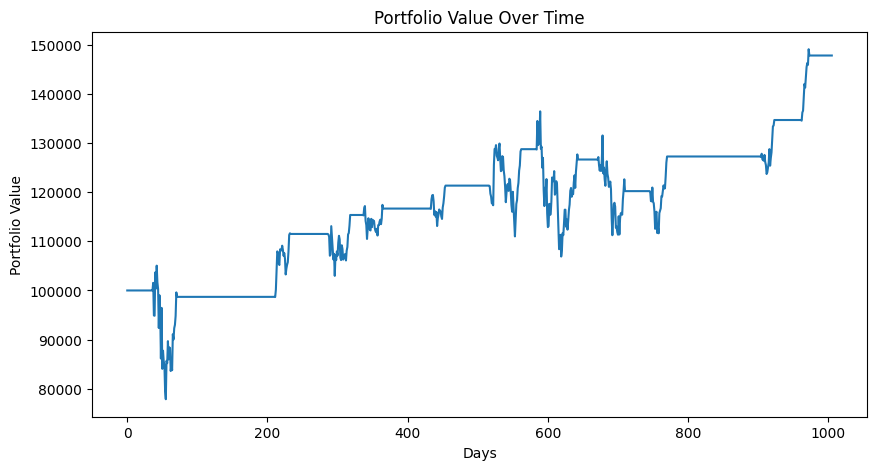

Final Portfolio Value: $147840.00


In [40]:

# Step 5: Analyze Results
# Plot the portfolio value over time
plt.figure(figsize=(10, 5))
plt.plot(data['Portfolio'])
plt.title('Portfolio Value Over Time')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.show()

# Print final portfolio value
final_value = data['Portfolio'].iloc[-1]
print(f'Final Portfolio Value: ${final_value:.2f}')

Initial capital: $100000.00.
Final portfolio value: $147840.00

In the plot below we can see the buy and sell signals generated over the period

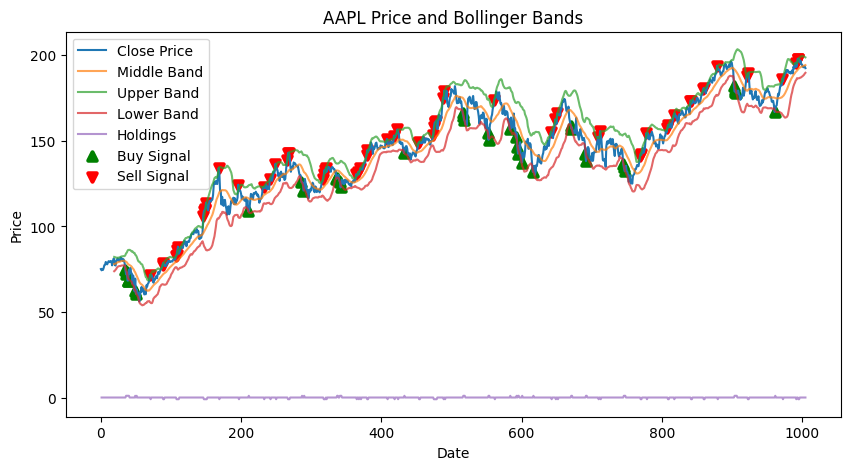

In [41]:

# Plot Bollinger Bands with buy and sell signals
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Middle Band'], label='Middle Band', alpha=0.7)
plt.plot(data['Upper Band'], label='Upper Band', alpha=0.7)
plt.plot(data['Lower Band'], label='Lower Band', alpha=0.7)
plt.plot(data['Position'],label='Holdings', alpha=0.7)
plt.scatter(data.loc[data['Signal'] == 1].index, 
            data['Close'][data['Signal'] == 1], 
            marker='^', color='g', lw=3, label='Buy Signal')
plt.scatter(data.loc[data['Signal'] == -1].index, 
            data['Close'][data['Signal'] == -1], 
            marker='v', color='r', lw=3, label='Sell Signal')
plt.title(f'{symbol} Price and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
